In [32]:
library(tidyverse)
library(scales)
library(zoo)
library(tidyquant)
df <- read.csv("Data/Full_Comments_no_body.csv",header = T,stringsAsFactors = F)
users <- read.csv("Data/User_Join_Dates.csv",header = T,stringsAsFactors = F)

Loading required package: lubridate


Attaching package: ‘lubridate’


The following objects are masked from ‘package:dplyr’:

    intersect, setdiff, union


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: PerformanceAnalytics

Loading required package: xts


Attaching package: ‘xts’


The following objects are masked from ‘package:dplyr’:

    first, last



Attaching package: ‘PerformanceAnalytics’


The following object is masked from ‘package:graphics’:

    legend


Loading required package: quantmod

Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Version 0.4-0 included new data defaults. See ?getSymbols.

══ Need to Learn tidyquant? ════════════════════════════════════════════════════
Business Science offers a 1-hour course - Learning Lab #9: Performance Analysis & Portfolio Optimization with tidyquant!
</> Learn more at: https

In [2]:
# formatting 'users'
users <- users[,2:3]
users$Join.Date <- as.Date(users$Join.Date)
users <- users %>% mutate(Days_active=as.integer(Sys.Date()-Join.Date)) %>% filter(!is.na(Join.Date))

In [3]:
# Formatting 'df'

df<-df[,2:ncol(df)] 

# Dates
df$Article_Date <- as.Date(df$Article_Date)
df$Comment_Date <- as.Date(df$Comment_Date)
# Trimming 
df$Article_Author <- stringr::str_trim(df$Article_Author)
df$Comment_Poster <- stringr::str_trim(df$Comment_Poster)

### Comment count over time

Warning message:
“Removed 29 row(s) containing missing values (geom_path).”


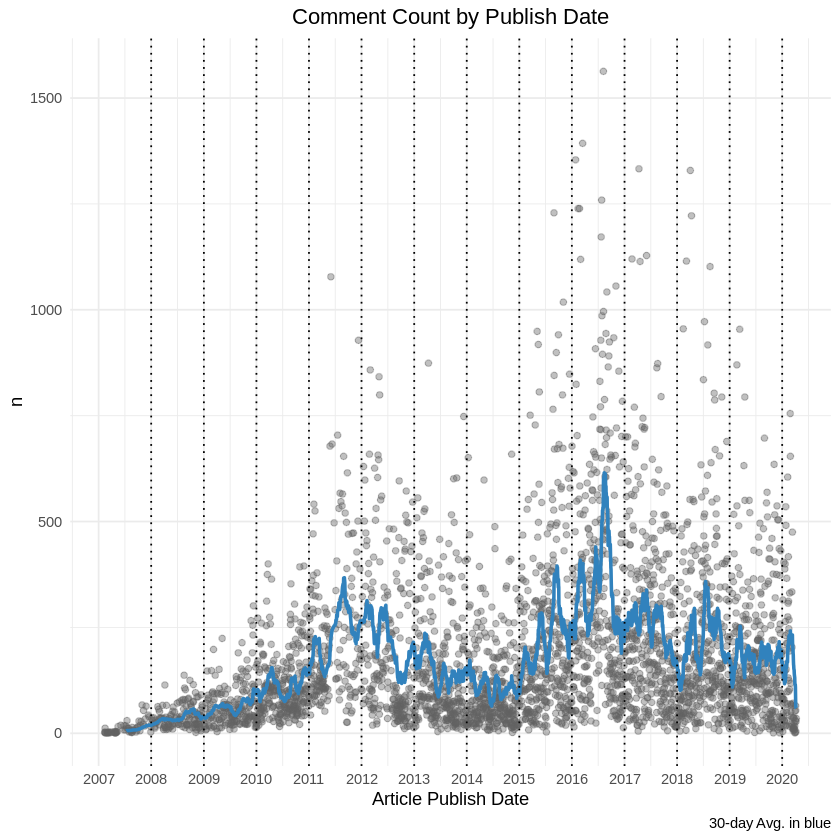

In [17]:
## Comment count over time
comments_time <- df %>% group_by(Article_Date) %>% tally()
comments_time$trailing_30_avg <- zoo::rollmeanr(comments_time$n,k=30,fill=NA)

ggplot(comments_time) +
  geom_point(aes(x=Article_Date, y=n), alpha=0.4, color="#636363") +
  #geom_line(aes(x=Article_Date,y=n), alpha=0.4) +
  #geom_point(aes(x=Article_Date, y=trailing_30_avg), color="#636363") +
  scale_x_date(date_breaks = "1 year", date_labels = "%Y") +
  geom_line(aes(x=Article_Date, y=trailing_30_avg), color="#3182bd", size=1) +
  geom_vline(xintercept = as.Date("2008-01-01"),linetype=3) +
  geom_vline(xintercept = as.Date("2009-01-01"),linetype=3) +
  geom_vline(xintercept = as.Date("2010-01-01"),linetype=3) +
  geom_vline(xintercept = as.Date("2011-01-01"),linetype=3) +
  geom_vline(xintercept = as.Date("2012-01-01"),linetype=3) +
  geom_vline(xintercept = as.Date("2013-01-01"),linetype=3) +
  geom_vline(xintercept = as.Date("2014-01-01"),linetype=3) +
  geom_vline(xintercept = as.Date("2015-01-01"),linetype=3) +
  geom_vline(xintercept = as.Date("2016-01-01"),linetype=3) +
  geom_vline(xintercept = as.Date("2017-01-01"),linetype=3) +
  geom_vline(xintercept = as.Date("2018-01-01"),linetype=3) +
  geom_vline(xintercept = as.Date("2019-01-01"),linetype=3) +
  geom_vline(xintercept = as.Date("2020-01-01"),linetype=3) +
  theme_minimal() +
  #theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
  #     panel.background = element_blank(), axis.line = element_line(colour = "black"),
  #     axis.text.x = element_text(angle=90)) +
  #ylab("Comment Count") + 
  xlab ("Article Publish Date") +
  labs(title="Comment Count by Publish Date",caption = "30-day Avg. in blue") +
  theme(plot.title = element_text(hjust = 0.5))

### Article count over time

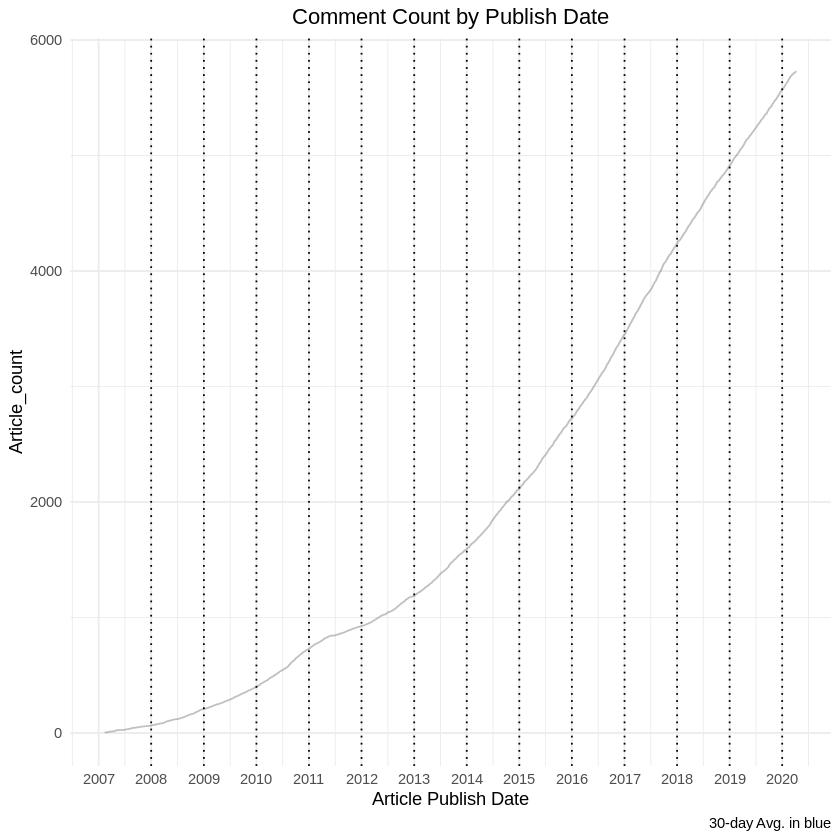

In [16]:
articles_time <- df %>% 
  select(Article_Title,Article_Date) %>% 
  unique() %>%
  arrange(Article_Date) %>% 
  mutate(Article_count=row_number())
#comments_time$trailing_30_avg <- zoo::rollmeanr(comments_time$n,k=30,fill=NA)

ggplot(articles_time) +
  geom_line(aes(x=Article_Date, y=Article_count), alpha=0.4, color="#636363") +
  #geom_line(aes(x=Article_Date,y=n), alpha=0.4) +
  #geom_point(aes(x=Article_Date, y=trailing_30_avg), color="#636363") +
  scale_x_date(date_breaks = "1 year", date_labels = "%Y") +
  #geom_line(aes(x=Article_Date, y=trailing_30_avg), color="#3182bd", size=1) +
  geom_vline(xintercept = as.Date("2008-01-01"),linetype=3) +
  geom_vline(xintercept = as.Date("2009-01-01"),linetype=3) +
  geom_vline(xintercept = as.Date("2010-01-01"),linetype=3) +
  geom_vline(xintercept = as.Date("2011-01-01"),linetype=3) +
  geom_vline(xintercept = as.Date("2012-01-01"),linetype=3) +
  geom_vline(xintercept = as.Date("2013-01-01"),linetype=3) +
  geom_vline(xintercept = as.Date("2014-01-01"),linetype=3) +
  geom_vline(xintercept = as.Date("2015-01-01"),linetype=3) +
  geom_vline(xintercept = as.Date("2016-01-01"),linetype=3) +
  geom_vline(xintercept = as.Date("2017-01-01"),linetype=3) +
  geom_vline(xintercept = as.Date("2018-01-01"),linetype=3) +
  geom_vline(xintercept = as.Date("2019-01-01"),linetype=3) +
  geom_vline(xintercept = as.Date("2020-01-01"),linetype=3) +
  theme_minimal() +
  #theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
  #     panel.background = element_blank(), axis.line = element_line(colour = "black"),
  #     axis.text.x = element_text(angle=90)) +
  #ylab("Comment Count") + 
  xlab ("Article Publish Date") +
  labs(title="Comment Count by Publish Date",caption = "30-day Avg. in blue") +
  theme(plot.title = element_text(hjust = 0.5))


In [6]:
df$Comment_Poster %>% unique() %>% length()

[1] 4602

In [7]:
comment_count <- df %>% group_by(Article_Title, Article_Date) %>% tally()
names(comment_count) <- c("Article_Title","Article_Date","Comment_Count")
head(comment_count)

Article_Title,Article_Date,Comment_Count
<chr>,<date>,<int>
'Family Match' Game Time Thread: Juventus A vs. Juventus B,2012-08-16,97
'Last Chance CL Saloon': Juventus v. Bayern,2009-12-07,255
'Win One For The Gipper',2009-01-24,147
'Ze Germán Is Coming!',2010-02-22,24
‘Letter to My Younger Self’: How Gianluigi Buffon overcame depression,2019-10-16,12
"""Bianconero e il calcio quello veeeeero""",2009-04-27,25


In [8]:
summary(comment_count$Comment_Count)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1      35      72     110     143    1078 

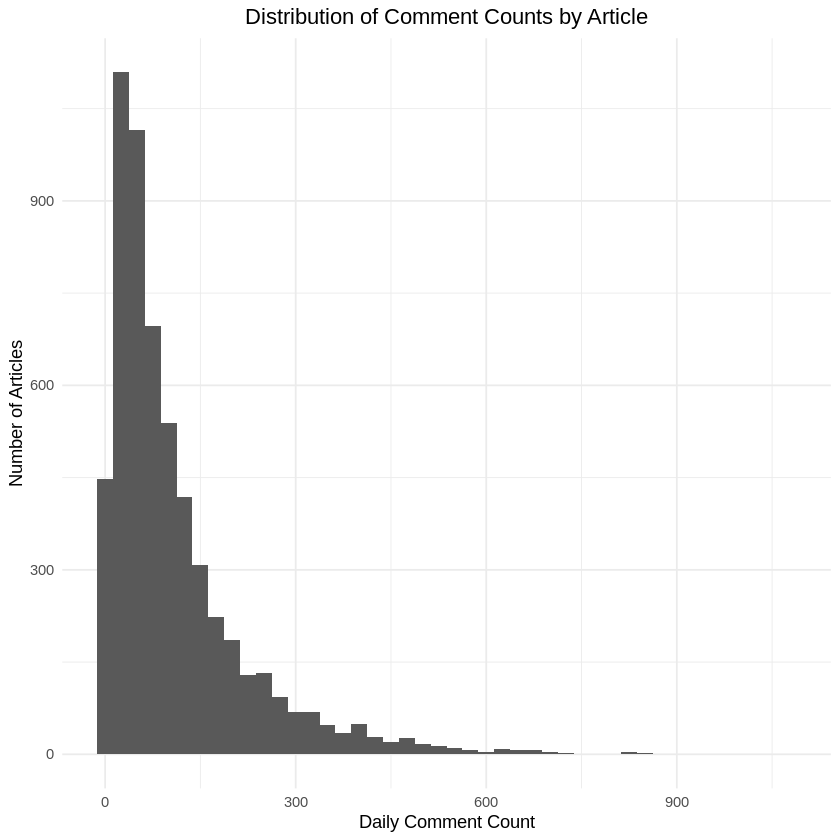

In [15]:
ggplot(comment_count, aes(x=Comment_Count)) + 
    geom_histogram(binwidth = 25) + 
    theme_minimal() + 
    xlab("Daily Comment Count") + ylab("Number of Articles") +
    ggtitle("Distribution of Comment Counts by Article") +
    theme(plot.title = element_text(hjust = 0.5))

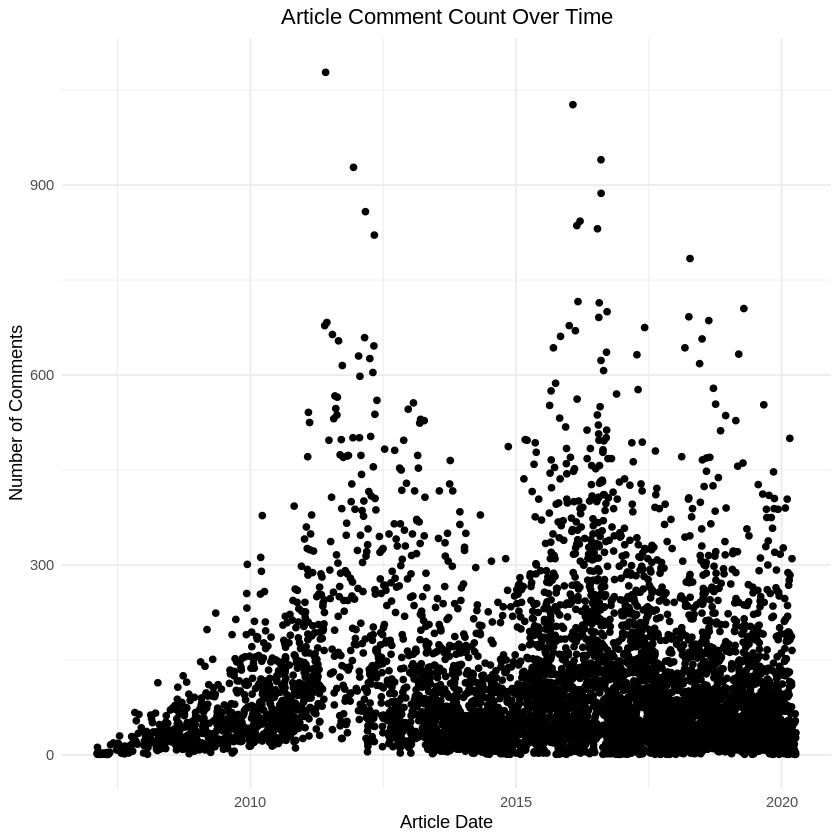

In [10]:
ggplot(comment_count, aes(x=Article_Date,y=Comment_Count)) + 
    geom_point() + 
    theme_minimal() +
    xlab("Article Date") + ylab("Number of Comments") +
    ggtitle("Article Comment Count Over Time") +
    theme(plot.title = element_text(hjust = 0.5))

In [11]:
glimpse(df)

Rows: 630,292
Columns: 8
$ Article_Title  <chr> "An Interview with Moggi's Lawyer", "An Interview with…
$ Article_Author <chr> "The Offside Juventus", "The Offside Juventus", "The O…
$ Article_Date   <date> 2010-04-01, 2010-04-01, 2010-04-01, 2010-04-01, 2010-…
$ Comment_Title  <chr> "", "", "", "", "", "", "", "", "", "", "", "", "", ""…
$ Comment_Poster <chr> "Juve 1897", "Juve 1897", "alessio", "Mohammed", "Moha…
$ Comment_Date   <date> 2010-04-01, 2010-04-01, 2010-04-01, 2010-04-01, 2010-…
$ Comment_Time   <chr> " 10:40 PM", " 11:17 PM", " 11:52 AM", " 12:21 PM", " …
$ Comment_Recs   <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…


## User Analysis

In [4]:
full <- left_join(df,users, by=c("Comment_Poster"="User"))
glimpse(full)

Rows: 630,292
Columns: 10
$ Article_Title  <chr> "An Interview with Moggi's Lawyer", "An Interview with…
$ Article_Author <chr> "The Offside Juventus", "The Offside Juventus", "The O…
$ Article_Date   <date> 2010-04-01, 2010-04-01, 2010-04-01, 2010-04-01, 2010-…
$ Comment_Title  <chr> "", "", "", "", "", "", "", "", "", "", "", "", "", ""…
$ Comment_Poster <chr> "Juve 1897", "Juve 1897", "alessio", "Mohammed", "Moha…
$ Comment_Date   <date> 2010-04-01, 2010-04-01, 2010-04-01, 2010-04-01, 2010-…
$ Comment_Time   <chr> " 10:40 PM", " 11:17 PM", " 11:52 AM", " 12:21 PM", " …
$ Comment_Recs   <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ Join.Date      <date> NA, NA, NA, NA, NA, NA, NA, NA, NA, 2009-09-04, NA, 2…
$ Days_active    <int> NA, NA, NA, NA, NA, NA, NA, NA, NA, 3882, NA, 3140, NA…


In [5]:
table(is.na(full$Join.Date))/nrow(full) # only have join dates for %30


    FALSE      TRUE 
0.7024411 0.2975589 

In [6]:
user_activity <- full %>% group_by(Comment_Poster,Join.Date,Days_active) %>% tally() %>% mutate(c_per_Day=n/Days_active)
glimpse(user_activity)

Rows: 4,602
Columns: 5
Groups: Comment_Poster, Join.Date [4,602]
$ Comment_Poster <chr> "_alexanderali", "_benito", "-a", "-nickt.-", ":(", "?…
$ Join.Date      <date> 2016-01-27, NA, NA, NA, NA, NA, 2008-03-31, NA, 2012-…
$ Days_active    <int> 1546, NA, NA, NA, NA, NA, 4404, NA, 2937, NA, NA, NA, …
$ n              <int> 2, 5, 1, 1, 1, 3, 1, 1, 2, 6, 1, 2, 4, 1, 2, 97, 4555,…
$ c_per_Day      <dbl> 0.0012936611, NA, NA, NA, NA, NA, 0.0002270663, NA, 0.…


Warning message:
“Removed 2282 rows containing missing values (geom_point).”


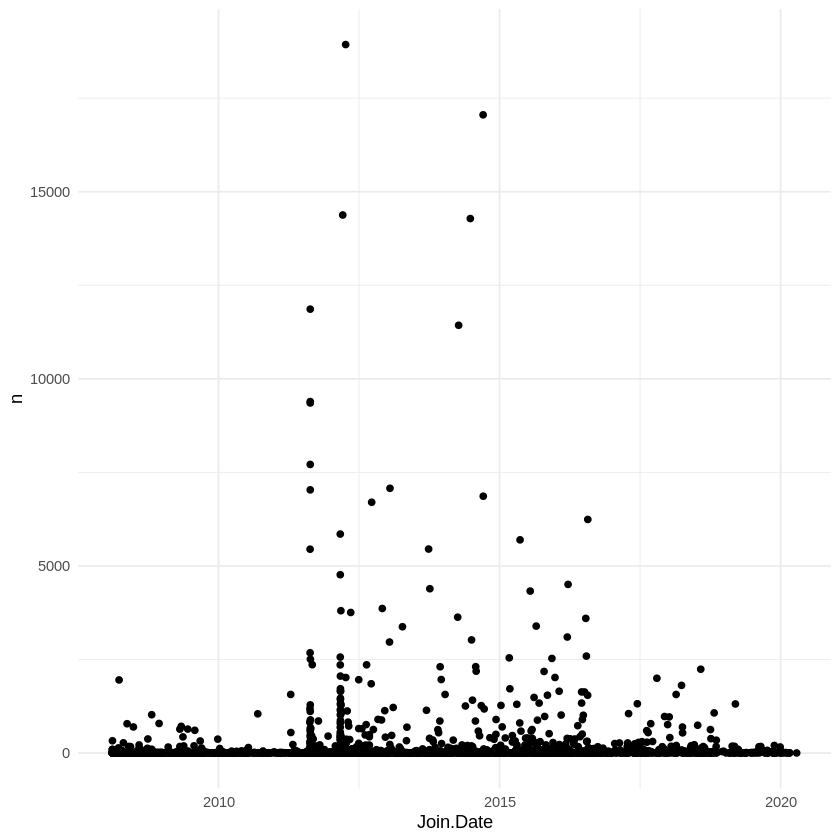

In [7]:
ggplot(user_activity, aes(x=Join.Date,y=n)) + geom_point() +theme_minimal()

In [8]:
head(user_activity)

Comment_Poster,Join.Date,Days_active,n,c_per_Day
<chr>,<date>,<int>,<int>,<dbl>
_alexanderali,2016-01-27,1546,2,0.001293661
_benito,NA,NA,5,NA
-a,NA,NA,1,NA
-nickt.-,NA,NA,1,NA
:(,NA,NA,1,NA
??,NA,NA,3,NA


In [9]:
first_of_month <- function(x){
    tmp_year <<- lubridate::year(x)
    tmp_month <<- lubridate::month(x)
    day <<- "01"
    
    output <- as.Date(paste(tmp_year,tmp_month,day,sep="-"))
}

first_of_month(user_activity$Join.Date)

In [10]:
user_activity$first_of_month <- first_of_month(user_activity$Join.Date)

In [11]:
head(user_activity)

Comment_Poster,Join.Date,Days_active,n,c_per_Day,first_of_month
<chr>,<date>,<int>,<int>,<dbl>,<date>
_alexanderali,2016-01-27,1546,2,0.001293661,2016-01-01
_benito,NA,NA,5,NA,NA
-a,NA,NA,1,NA,NA
-nickt.-,NA,NA,1,NA,NA
:(,NA,NA,1,NA,NA
??,NA,NA,3,NA,NA


In [12]:
Join_Dates <- user_activity %>% filter(!is.na(Join.Date)) %>% group_by(first_of_month) %>% tally()

In [13]:
head(Join_Dates)

first_of_month,n
<date>,<int>
2008-02-01,34
2008-03-01,41
2008-04-01,33
2008-05-01,20
2008-06-01,14
2008-07-01,13


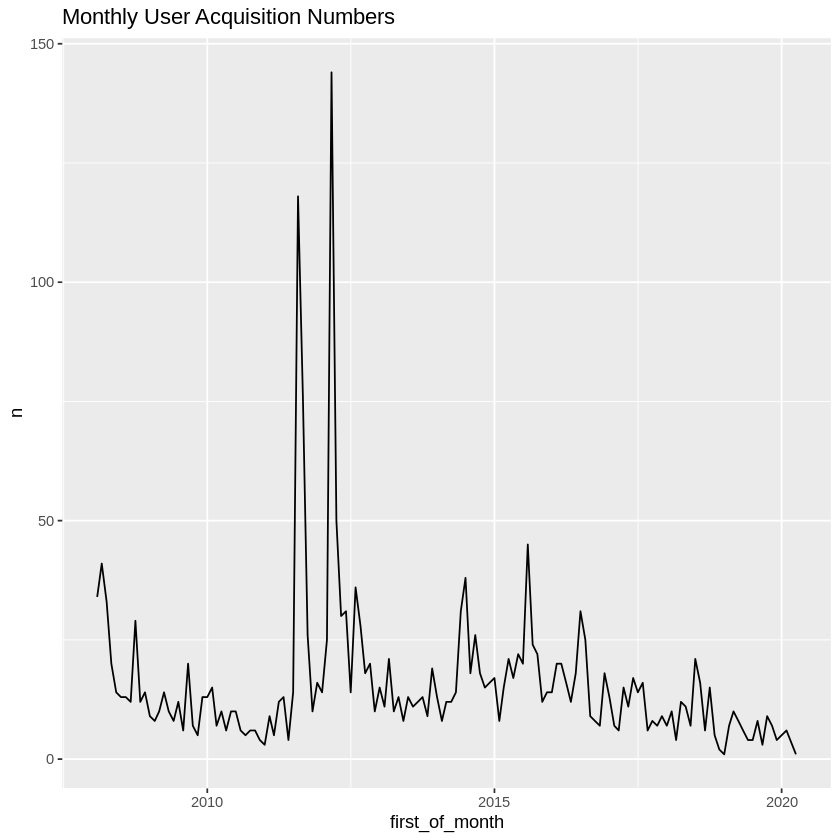

In [14]:
ggplot(Join_Dates, aes(x=first_of_month, y=n)) + geom_line() + ggtitle("Monthly User Acquisition Numbers")

In [15]:
sum(Join_Dates$n) # only have join dates for 2,320 users from a total of 6,000

[1] 2320

In [16]:
glimpse(full)

Rows: 630,292
Columns: 10
$ Article_Title  <chr> "An Interview with Moggi's Lawyer", "An Interview with…
$ Article_Author <chr> "The Offside Juventus", "The Offside Juventus", "The O…
$ Article_Date   <date> 2010-04-01, 2010-04-01, 2010-04-01, 2010-04-01, 2010-…
$ Comment_Title  <chr> "", "", "", "", "", "", "", "", "", "", "", "", "", ""…
$ Comment_Poster <chr> "Juve 1897", "Juve 1897", "alessio", "Mohammed", "Moha…
$ Comment_Date   <date> 2010-04-01, 2010-04-01, 2010-04-01, 2010-04-01, 2010-…
$ Comment_Time   <chr> " 10:40 PM", " 11:17 PM", " 11:52 AM", " 12:21 PM", " …
$ Comment_Recs   <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ Join.Date      <date> NA, NA, NA, NA, NA, NA, NA, NA, NA, 2009-09-04, NA, 2…
$ Days_active    <int> NA, NA, NA, NA, NA, NA, NA, NA, NA, 3882, NA, 3140, NA…


In [17]:
# Grouping by article date, counting proportion of NAs for Join Date

In [20]:
unique_commentors_article <- full %>% 
    group_by(Article_Date,Article_Title, Comment_Poster, Join.Date) %>% 
    unique() %>%
    group_by(Article_Date,Article_Title) %>%
    summarise(Prop_Join_NA=sum(is.na(Join.Date))/n())
#rollmean(x, k, fill = if (na.pad) NA, na.pad = FALSE, 
#  align = c("center", "left", "right"), ...)

In [19]:
head(unique_commentors_article)

Article_Date,Article_Title,Prop_Join_NA
<date>,<chr>,<dbl>
2007-02-13,"March 12, 2003 Igor Tudor Day",0.0000000
2007-02-14,Primavera Player Profile- Sebastian Giovinco,1.0000000
2007-02-15,"February 15, 2007 Quick Notes",0.5833333
2007-02-16,STOP THE PRESSES! TUDOR STAYS!......and other junk,0.0000000
2007-02-21,Weekend Wrap Up..... a little tardy,0.0000000
2007-03-01,Thursday March 1 - Quick Notes: Camoranesi Unleashes & A Serious Note,0.0000000


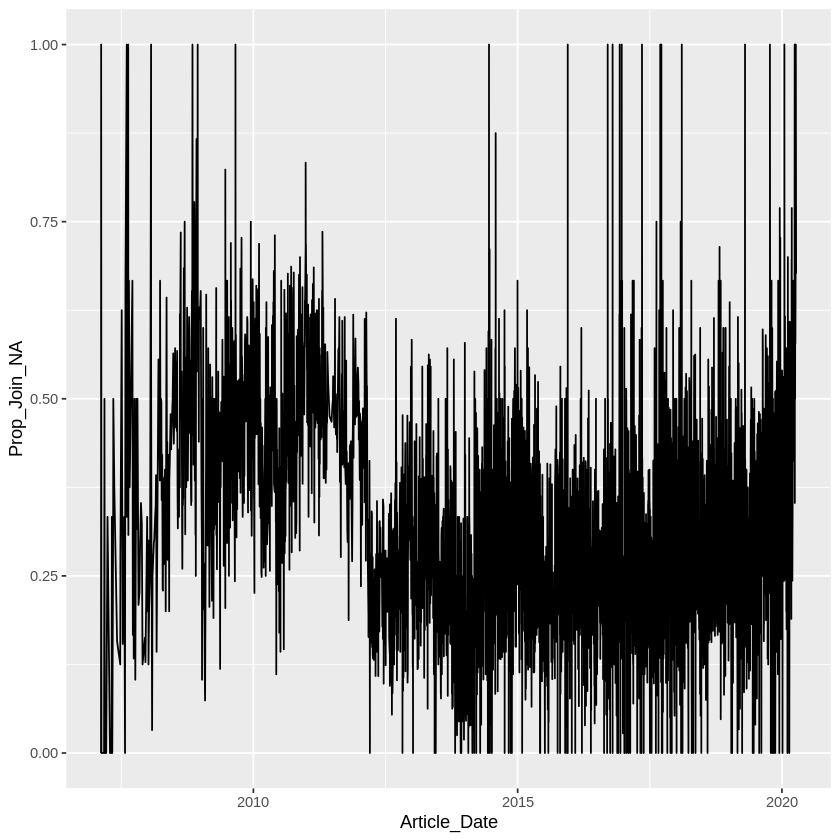

In [61]:
ggplot(unique_commentors_article, aes(x=Article_Date,y=Prop_Join_NA)) + geom_line()

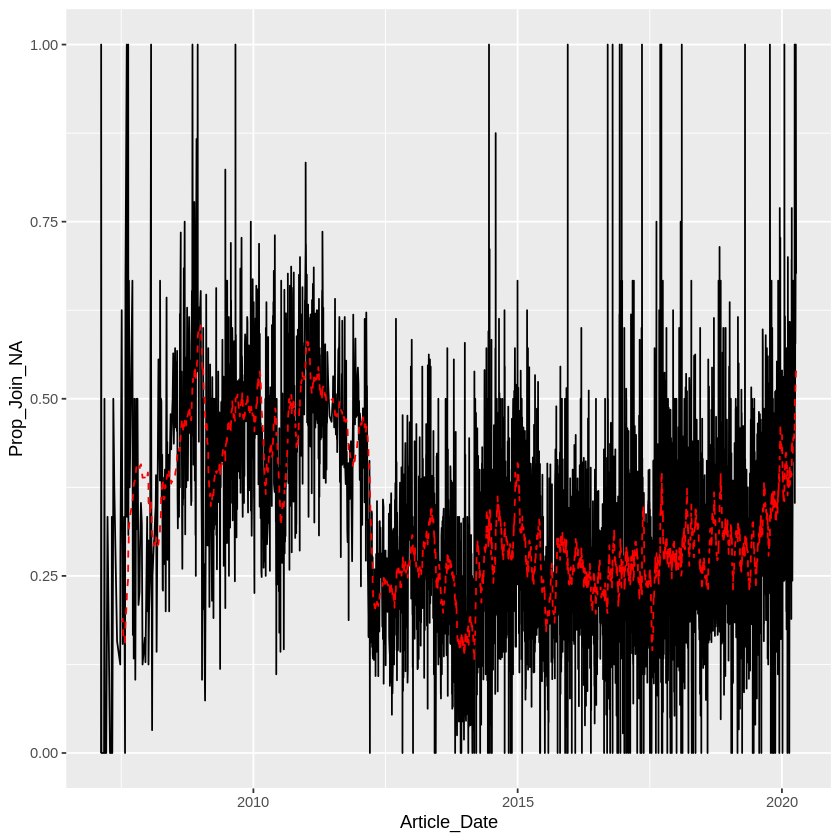

In [34]:
ggplot(unique_commentors_article, aes(x=Article_Date,y=Prop_Join_NA)) + geom_line() + geom_ma(ma_fun=SMA, n=30, color="red")